In [ ]:
!pip install mtcnn
#!pip install keras_vggface
! pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 20.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-2_tqams7
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-2_tqams7
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=d321bae288e40d4943d3cf9f6c84e50f13b8088bc277db70eee2a968f526b6c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-b1kmm__g/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.1 MB/s 


In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input,decode_predictions
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine 
from os import walk
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

Shape of image/array: (667, 1200, 3)


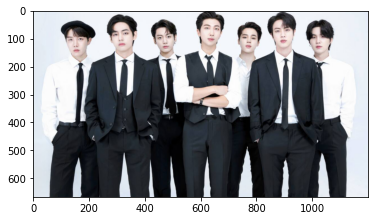

In [ ]:
import matplotlib.pyplot as plt
filename = "Input/BTS_1.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [ ]:
Input_path = 'Input'
input_file  = [] 

input_filenames = next(walk(Input_path), (None, None, []))[2]
for i in input_filenames:
    print(i)
    filename = Input_path + '/'+i
    input_file.append(filename)

BTS_1.jpg


In [ ]:
#Object to store the face of input image 
class userface:
      def __init__(self,name,id,celebrity,score,face_image):
          self.name = name 
          self.id = id
          self.matched = celebrity
          self.score = score
          self.face_image = face_image

In [ ]:
#Face alignment function
detector = MTCNN(steps_threshold=[0.0, 0.0, 0.0])

def landmarks(img):
    faces = detector.detect_faces(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    face = max(faces, key=lambda x: x['confidence'])  # The most clear one
    return face['keypoints']

def affineMatrix(lmks, scale=2.5):
    nose = np.array(lmks['nose'], dtype=np.float32)
    left_eye = np.array(lmks['left_eye'], dtype=np.float32)
    right_eye = np.array(lmks['right_eye'], dtype=np.float32)
    eye_width = right_eye - left_eye
    angle = np.arctan2(eye_width[1], eye_width[0])
    center = nose
    alpha = np.cos(angle)
    beta = np.sin(angle)
    w = np.sqrt(np.sum(eye_width**2)) * scale
    m = [[alpha, beta, -alpha * center[0] - beta * center[1] + w * 0.5],
        [-beta, alpha, beta * center[0] - alpha * center[1] + w * 0.5]]
    return np.array(m), (int(w), int(w))


'\nimg = cv2.imread(INPUT_IMAGE)\nresize_img = cv2.resize(img,dsize=(224,224))\nmat, size = affineMatrix(landmarks(resize_img ))\naline_img =  cv2.warpAffine(resize_img, mat, size)\nimg2 = cv2.imread(INPUT_IMAGE2)\nresize_img2 = cv2.resize(img2,dsize=(224,224))\nmat2, size2 = affineMatrix(landmarks(resize_img2))\naline_img2 =  cv2.warpAffine(resize_img2, mat2, size2)\n'

In [ ]:
#Do Alignment of celebrity
dataset_path = 'Image'
Align_path = 'Align'
celebrity_filenames = next(walk(dataset_path), (None, None, []))[2]   
for j in celebrity_filenames:
    filename = dataset_path + '/'+j
    img = cv2.imread(filename)
    resize_img = cv2.resize(img,dsize=(500,500)) # After compress image,face may not clear to show
    mat, size = affineMatrix(landmarks(resize_img ))
    align_img =  cv2.warpAffine(resize_img, mat, size)
    align_img = cv2.cvtColor(align_img, cv2.COLOR_BGR2RGB)
    output_filename = Align_path+'/'+j
    print(output_filename)
    cv2.imwrite(output_filename, align_img)

264/264 [==============================] - 11s 40ms/step
Align/Henry Cavill_1.jpg
266/266 [==============================] - 11s 41ms/step
Align/Jungkook_1.jpg
263/263 [==============================] - 11s 41ms/step
Align/Dean Schneider_1.jpg
261/261 [==============================] - 11s 41ms/step
Align/V_1.jpg
266/266 [==============================] - 11s 41ms/step
Align/Chris Hemsworth_1.jpg


In [ ]:
INPUT_IMAGE = input_file[0]

img = cv2.imread(INPUT_IMAGE)
resize_img = cv2.resize(img,dsize=(700,700))
faces = detector.detect_faces(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
print(len(faces))
i = 0 
Possible_face = []
for face in faces:
    if face['confidence'] > 0.99:
       mat,size = affineMatrix(face['keypoints'])
       align_img =  cv2.warpAffine(resize_img, mat, size)
       align_img =  cv2.cvtColor(align_img, cv2.COLOR_BGR2RGB)
       x = userface(INPUT_IMAGE,i,"",0,align_img)
       Possible_face.append(x)
       i = i +1 

480/480 [==============================] - 20s 41ms/step
1443


In [ ]:
print(len(Possible_face))

7


In [ ]:
aline_filenames = next(walk(Align_path), (None, None, []))[2]   
aline_image=[]
for i in aline_filenames:
    filename = Align_path+'/'+i
    aline_image.append(filename)


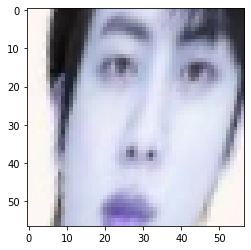

In [ ]:
plt.imshow(Possible_face[0].face_image)
plt.show()

In [ ]:
align_img2 = plt.imread(align_image[0])
align_image_RGB = cv2.cvtColor(align_img, cv2.COLOR_BGR2RGB)
plt.imshow(align_img2)
plt.show()

NameError: ignored

In [ ]:
def extract_face(image,resize=(224,224)):
    faces = detector.detect_faces(image)
    x1,y1,width,height = faces[0]['box']
    x2,y2 = x1+width,y1+height
    face_boundary = image[y1:y2,x1:x2]
    face_image = cv2.resize(face_boundary,resize)
    return face_image

In [ ]:
def get_embeddings(faces):
    face  = np.asarray(faces,'float32')
    face =  preprocess_input(face,version=2)
    model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')
    yhat = model.predict(face)
    return yhat

In [ ]:
def get_similarity(faces):
    embeddings = get_embeddings(faces)
    score = cosine(embeddings[0],embeddings[1])
    return score


In [ ]:

def search_most_similar_face(align_img):
    images2 =[]
    user_face = extract_face(align_img)
    min_score = 1 
    min_filename = ''
    for i in aline_filenames:
        images2.append(user_face)
        imagename = Align_path + '/'+i
        compared_img = plt.imread(imagename)
        temp_face = extract_face(compared_img)
        images2.append(temp_face)
        score = get_similarity(images2)
        if score < min_score:
           min_score = score
           min_filename = i 
        images2.clear()
      
    if min_score < 0.5:
       return [min_score,min_filename]
    
    else:
       return [min_score,min_filename]

In [ ]:

for user in Possible_face:
    result = search_most_similar_face(user.face_image)
    user.score = result[0]
    user.matched = result[1]

1/1 [==============================] - 1s 1s/step


In [ ]:
for user in Possible_face:
    print(user.name)
    print(user.id)
    print(user.score)
    print(user.matched)

Input/BTS_1.jpg
0
0.5006150305271149
Jungkook_1.jpg
Input/BTS_1.jpg
1
0.4699600338935852
Jungkook_1.jpg
Input/BTS_1.jpg
2
0.5291942656040192
Jungkook_1.jpg
Input/BTS_1.jpg
3
0.43718165159225464
V_1.jpg
Input/BTS_1.jpg
4
0.5701841711997986
Jungkook_1.jpg
Input/BTS_1.jpg
5
0.46085238456726074
Jungkook_1.jpg
Input/BTS_1.jpg
6
0.5332926511764526
Jungkook_1.jpg
